In [1]:
import csv
import io
import json
import math
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.data import Dataset
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer
from tensorflow.keras.utils import to_categorical

from IPython.display import Image

%load_ext autoreload
%autoreload 2

In [2]:
from project.preprocess_ingredients import preprocess_ingredients, decode_ingredients
from project.dataset import load_dataset_for_ingredient_prediction, load_image, load_image_as_pixels, load_pandas_dataset

In [48]:
DATASET_ROOT = os.path.join("project", "dataset")
DATASET_CSV_PATH = os.path.join(DATASET_ROOT, "Food Ingredients and Recipe Dataset with Image Name Mapping.csv")
images, ingredients, valid_ingredients_list, dataset_size = load_dataset_for_ingredient_prediction(csv_file_path=DATASET_CSV_PATH, 
                                                                                     preprocess_func=preprocess_ingredients,
                                                                                     is_ipynb=True)

Dataset columns: ['id', 'Title', 'Ingredients', 'Instructions', 'Image_Name', 'Cleaned_Ingredients']
Removed 8 rows containing NaN
salt		 --->		 8063
olive oil		 --->		 4890
sugar		 --->		 3590
garlic cloves		 --->		 3575
unsalted butter		 --->		 3360
black pepper		 --->		 3269
egg		 --->		 2584
all-purpose flour		 --->		 2322
lemon juice		 --->		 2166
vegetable oil		 --->		 1925
water		 --->		 1734
onion		 --->		 1583
vanilla extract		 --->		 1325
brown sugar		 --->		 1188
parsley		 --->		 1089
milk		 --->		 1064
ginger		 --->		 1043
shallots		 --->		 1031
cinnamon		 --->		 969
lime juice		 --->		 895
heavy cream		 --->		 878
baking powder		 --->		 868
carrots		 --->		 866
chicken broth		 --->		 803
thyme		 --->		 777
honey		 --->		 763
red onion		 --->		 731
parmesan cheese		 --->		 685
egg yolk		 --->		 672
butter		 --->		 658
soy sauce		 --->		 645
cilantro		 --->		 644
bay leaf		 --->		 627
white wine		 --->		 624
red-pepper flakes		 --->		 614
baking soda		 --->		 583
lemon zest	

In [4]:
# count = 0
# total = 0
# with open(os.path.join('project', 'len.txt')) as fp:
#     lines = fp.readlines()
# for line in lines:
#     int_line = int(line)
#     total += int_line
#     count += 1

In [5]:
# total

In [6]:
# count

In [7]:
# total / count

In [49]:
df, v_ingredients = load_pandas_dataset(csv_file_path=DATASET_CSV_PATH, preprocess_func=preprocess_ingredients)

Dataset columns: ['id', 'Title', 'Ingredients', 'Instructions', 'Image_Name', 'Cleaned_Ingredients']
Removed 8 rows containing NaN


In [50]:
df.head()

,id,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,JSON_Ingredients,Processed_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"[chicken, salt, acorn squash, sage, rosemary, ...","[Pat chicken dry with paper towels, season all...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","[""1 (3\u00bd\u20134-lb.) whole chicken"", ""2\u0...","[0, 1, 4, 5, 7, 23, 26, 33, 34, 49, 91, 103, 1..."
1,1,Crispy Salt and Pepper Potatoes,"[2 large egg whites, 1 pound new potatoes (abo...",[Preheat oven to 400°F and line a rimmed bakin...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...","[""2 large egg whites"", ""1 pound new potatoes (...","[0, 5, 14, 24, 49, 54, 77]"
2,2,Thanksgiving Mac and Cheese,"[1 cup evaporated milk, 1 cup whole milk, 1 ts...",[Place a rack in middle of oven; preheat to 40...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...","[""1 cup evaporated milk"", ""1 cup whole milk"", ...","[0, 5, 15, 43, 88, 141]"
3,3,Italian Sausage and Bread Stuffing,"[Italian bread loaf, olive oil, divided, sweet...",[Preheat oven to 350°F with rack in middle. Ge...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...","[""1 (\u00be- to 1-pound) round Italian loaf, c...","[1, 3, 4, 6, 11, 14, 20, 135, 180]"
4,4,Newton's Law,"[dark brown sugar, hot water, bourbon, lemon j...",[Stir together brown sugar and hot water in a ...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...","[""1 teaspoon dark brown sugar"", ""1 teaspoon ho...","[8, 10, 13, 18]"


In [59]:
for idx in range(0, 1):
    print(idx)
    print(df.loc[idx, 'Ingredients'])
    for i in df.loc[idx, 'Processed_Ingredients']:
        print(i, '--->>>', v_ingredients[i])
    print()

0
['chicken', 'salt', 'acorn squash', 'sage', 'rosemary', 'unsalted butter', 'allspice', 'red pepper flakes', 'ground black pepper', 'white bread', 'apples', 'extra-virgin olive oil', 'red onion', 'apple cider vinegar', 'white miso', 'all-purpose flour', 'unsalted butter', 'white wine', 'unsalted chicken broth', 'white miso', 'Kosher salt', 'ground black pepper']
0 --->>> salt
1 --->>> olive oil
4 --->>> unsalted butter
5 --->>> black pepper
7 --->>> all-purpose flour
23 --->>> chicken broth
26 --->>> red onion
33 --->>> white wine
34 --->>> red-pepper flakes
49 --->>> rosemary
91 --->>> apple-cider vinegar
103 --->>> allspice
118 --->>> chicken
120 --->>> sage



In [11]:
# with open(os.path.join('project', 'index_ingredient_map.json'), 'r') as fp:
#     index_ingredient_map = json.load(fp)
# index_ingredient_map

In [12]:
# for ii, pi in zip(df.loc[0]['Ingredients'], df.loc[0]['Processed_Ingredients']):
#     print(pi, '\t--->\t', ii)

In [54]:
v_ingredients[:10]

('salt',
 'olive oil',
 'sugar',
 'garlic cloves',
 'unsalted butter',
 'black pepper',
 'egg',
 'all-purpose flour',
 'lemon juice',
 'vegetable oil')

In [14]:
images

<_ParallelMapDataset element_spec=TensorSpec(shape=(None, None, 3), dtype=tf.float32, name=None)>

In [15]:
ingredients

<_FlatMapDataset element_spec=TensorSpec(shape=(None,), dtype=tf.int32, name=None)>

In [66]:
len(valid_ingredients_list)

219

In [17]:
valid_ingredients_list[0:25]

('kosher salt',
 'olive oil',
 'unsalted butter',
 'sugar',
 'salt',
 'black pepper',
 'garlic cloves',
 'extra-virgin olive',
 'lemon juice',
 'all-purpose flour',
 'eggs',
 'vegetable oil',
 'water',
 'vanilla extract',
 'brown sugar',
 'onion',
 'sea salt',
 'parsley',
 'ginger',
 'milk',
 'cinnamon',
 'thyme',
 'lime juice',
 'cilantro',
 'heavy cream')

In [27]:
for idx, image_ingredient in enumerate(zip(images, ingredients)):
    image = image_ingredient[0]
    ingredient = image_ingredient[1]
    if idx >= 1:
        break
    print(f"image.shape:      \n{image.shape}\n")
    print(f"image channel 0:  \n{image[:, :, 0]}\n")
    print(f"ingredient.shape: \n{ingredient.shape}\n")
    print(f"ingredient:       \n{ingredient}\n")

image.shape:      
(169, 274, 3)

image channel 0:  
[[235. 236. 236. ... 233. 230. 233.]
 [234. 234. 235. ... 234. 231. 234.]
 [233. 233. 234. ... 234. 235. 238.]
 ...
 [229. 228. 226. ... 226. 227. 227.]
 [220. 219. 219. ... 227. 228. 228.]
 [226. 224. 227. ... 227. 225. 226.]]

ingredient.shape: 
(24,)

ingredient:       
[   0    1    2    5    7    9   10   23   24   26   36   40   42   52
   54   57   71   78  124  155  227  348  479 1407]



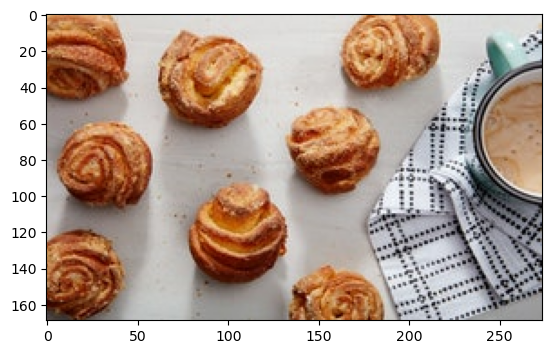

In [8]:
test_filename = os.path.join('project', 'dataset', 'Food Images', 'Food Images', '3-ingredient-morning-buns.jpg')
test_image = load_image_as_pixels(test_filename)
# Image(filename=test_filename, retina=True)
_ = plt.imshow(test_image)

In [9]:
IMG_SIZE = 224
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
])

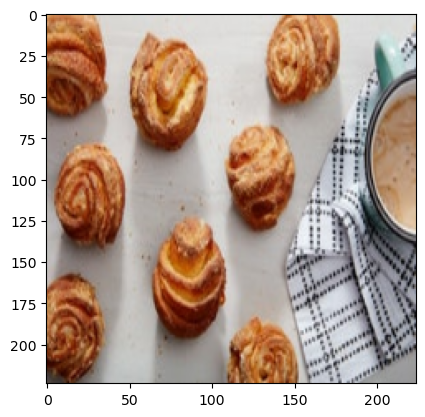

In [10]:
result = resize_and_rescale(test_image)
_ = plt.imshow(result)

In [11]:
random_flip = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical')
])
random_rotation = tf.keras.Sequential([
    layers.RandomRotation(0.2)
])
random_crop = tf.keras.Sequential([
    layers.RandomCrop(width=200, height=200)
])
random_zoom = tf.keras.Sequential([
    layers.RandomZoom(height_factor=(0.8, 0.9), fill_mode='wrap')
])
data_augmentation = tf.keras.Sequential([
    random_flip,
    random_rotation,
    random_zoom
])

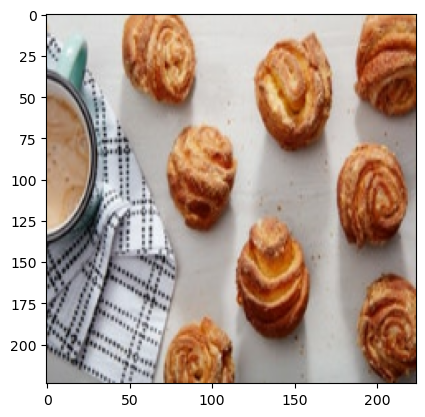

In [12]:
flip = random_flip(result)
_ = plt.imshow(flip)

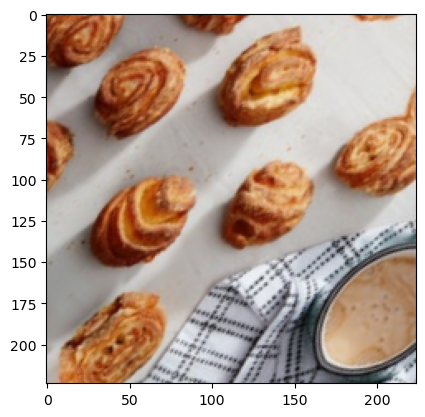

In [13]:
rotation = random_rotation(result)
_ = plt.imshow(rotation)

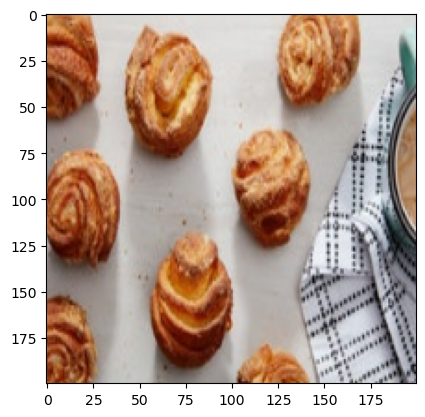

In [14]:
crop = random_crop(result)
_ = plt.imshow(crop)

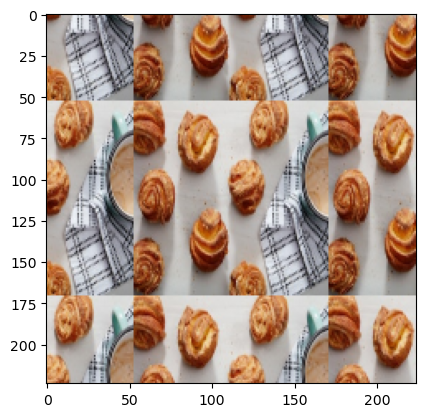

In [15]:
zoom = random_zoom(result)
_ = plt.imshow(zoom)

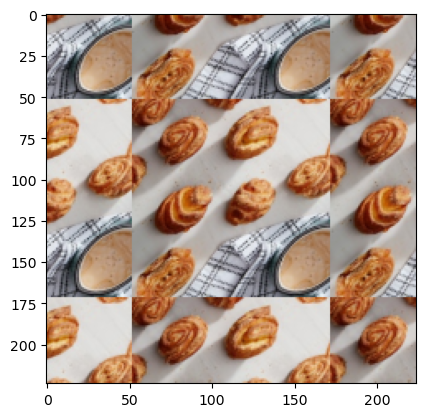

In [16]:
augmented = data_augmentation(result)
_ = plt.imshow(augmented)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (224, 224, 3)             0         
                                                                 
 sequential_5 (Sequential)   (224, 224, 3)             0         
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                               

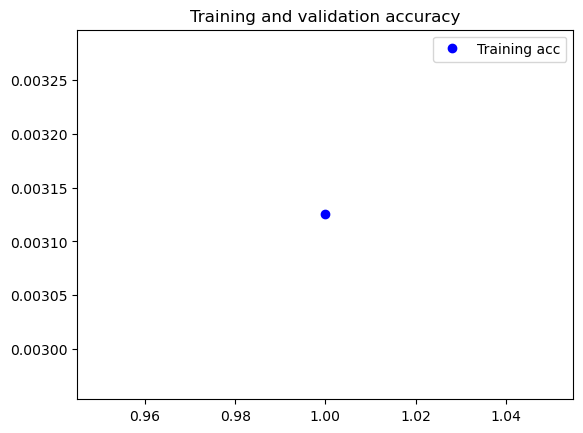

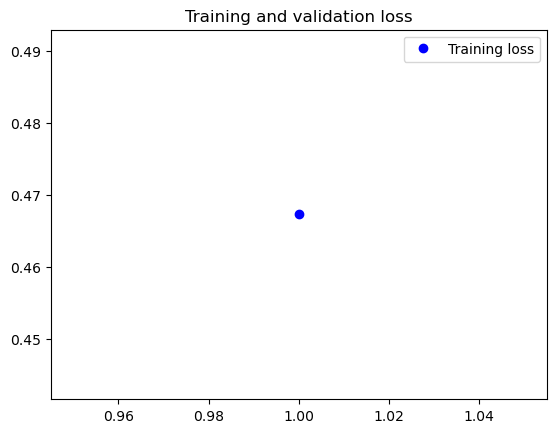

In [31]:
# HYPERPARAMETERS
# test_predict_ingredients.py
#TODO: test
def multi_hot(x, num_classes):
    return tf.reduce_sum(tf.one_hot(x, num_classes), -2)

#transform from list of ints to multihot
NUM_INGREDIENTS = len(valid_ingredients_list)

ingredients_data = ingredients.map(lambda x: multi_hot(x, NUM_INGREDIENTS), num_parallel_calls=tf.data.AUTOTUNE)

#TODO: params for optimizer/learning rate
ACTI = "swish"
CONV_KERNEL_SIZE = 3
POOL_SIZE = 2
CONV_DEPTHS = [32, 32, 32]
#TODO: reshape inputs to fixed size
#this was determined after inspecting image size in dataset
IMAGE_SIZE = [169, 274, 3]
DENSE_SIZES = [128]
BATCH_SIZE = 32
EPOCHS = 1

model = Sequential()
model.add(InputLayer(IMAGE_SIZE))

# TODO: check if data augmentation will work for images
IMG_SIZE = 224
model.add(resize_and_rescale)
model.add(data_augmentation)

#conv/pool blocks
for size in CONV_DEPTHS:
    model.add(Conv2D(size, CONV_KERNEL_SIZE, activation=ACTI, padding="same"))
    model.add(MaxPooling2D(POOL_SIZE))

model.add(Flatten())

#a stack of dense layers
for size in DENSE_SIZES:
    model.add(Dense(size, activation=ACTI))

#final classification layer, sigmoid activation for multi-hot output
model.add(Dense(NUM_INGREDIENTS, activation="sigmoid"))

#TODO: better metrics (accuracy might not be useful due to imbalanced ingredient occurrence)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

# ii = iter(images)
# #TODO: testing to see if theres an issue with images/loading process
# for name in image_names:
#     print(name)
#     print(next(ii).shape)

#zip and batch dataset
dataset = Dataset.zip((images, ingredients_data))
dataset = dataset.batch(batch_size=BATCH_SIZE, drop_remainder=True)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# dataset = dataset.shuffle()
# test_dataset = dataset.take(1000)
# train_dataset = dataset.skip(1000)

#TODO: breaks after a couple hundred batches apparently
history = model.fit(dataset, epochs=EPOCHS)
train_accuracy = history.history['accuracy']
# validation_accuracy = history.history['val_']
train_loss = history.history['loss']
# validation_loss = history.history['val_loss']

epochs_graph = range(1, len(train_accuracy) + 1)

plt.plot(epochs_graph, train_accuracy, 'bo', label='Training acc')
# plt.plot(epochs_graph, validation_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_graph, train_loss, 'bo', label='Training loss')
# plt.plot(epochs_graph, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()